In [60]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [61]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in photometric prior mode

In [62]:
magnitude_columns = [
                    ('nnmag_grz', 'auto'),
                    ('nnmag_grzw1w2', 'auto'),
                    ('nnmag_grzw1w2w3w4', 'auto'),
                    #('mag_g', 'auto'),
                    #('mag_r', 'auto'),
                    #('mag_z', 'auto'),
                    #('mag_w1', 'auto'),
                    #('mag_w2', 'auto'),
                    #('col_gr', 'auto'),
                    #('col_rz', 'auto'),
                    #('col_zw1', 'auto'),
                    #('col_rw2', 'auto')
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1, 'magauto_post_single_minvalue':0.7 }

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:03<00:00, 2790.91it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogram of column "DESI_nnmag_grz": 310 secure matches, 29880 insecure matches and 656849 secure non-matches of 2418574 total entries (662868 valid)


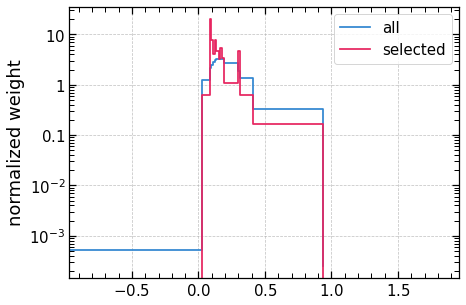

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  # undefined magnitudes do not contribute
Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogram of column "DESI_nnmag_grzw1w2": 2043 secure matches, 29880 insecure matches and 1208103 secure non-matches of 2418574 total entries (1222612 valid)


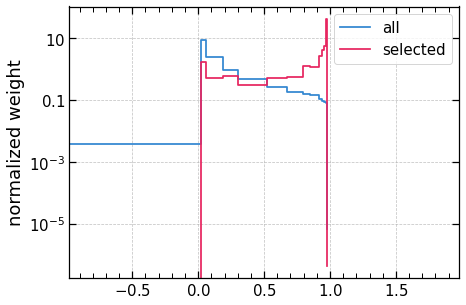

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogram of column "DESI_nnmag_grzw1w2w3w4": 2293 secure matches, 29880 insecure matches and 453837 secure non-matches of 2418574 total entries (462226 valid)


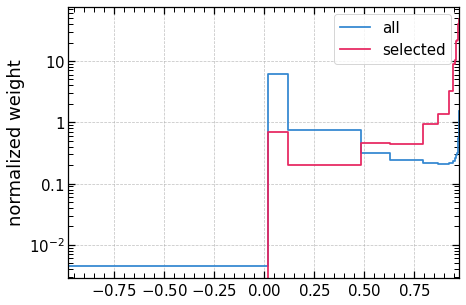


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [63]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 2735.23it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogram of column "DESI_nnmag_grz": 202 secure matches, 15650 insecure matches and 658592 secure non-matches of 2418574 total entries (662868 valid)


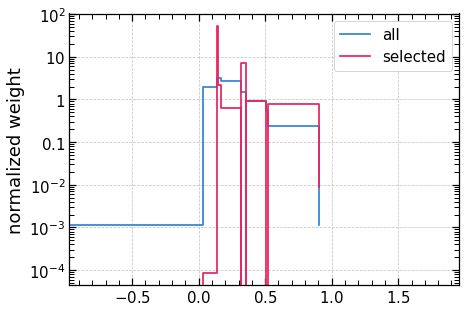

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  # undefined magnitudes do not contribute
Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogram of column "DESI_nnmag_grzw1w2": 359 secure matches, 15650 insecure matches and 1214622 secure non-matches of 2418574 total entries (1222612 valid)


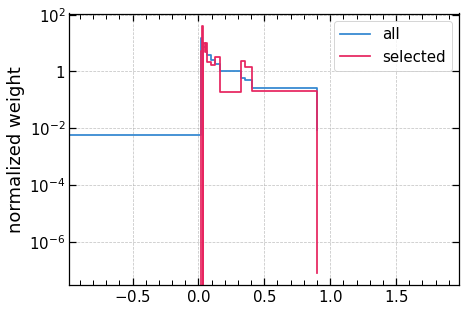

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogram of column "DESI_nnmag_grzw1w2w3w4": 139 secure matches, 15650 insecure matches and 459279 secure non-matches of 2418574 total entries (462226 valid)


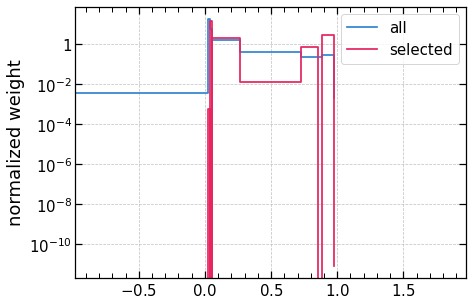


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [64]:

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)


For a false detection rate of <5%
--> use only counterparts with p_any>0.84 (58.22% of matches)
The efficiency is 77.98%
The purity is  78.36%


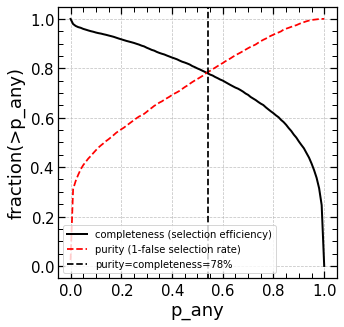

In [65]:
cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)
#plt.figure(figsize=(10,10))
#nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
#nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

## Asses the performance of the NWAY with validation catalog (CSC & XMM)

In [66]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
#nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 93% 
 Purity = 93% 
 prob_has_match optimal cutoff =  0.51 
 Fraction of sources with prob_has_match > 0.51 = 80%
+++Statistics+++
687 X-ray sources in validation set with counterparts
--Out of those, 45 sources were assigned hostless (prob_has_match < 0.51) 
642 sources have prob_has_match > 0.51
Out of those 642: 
--600 sources have correct nway counterpart
--42 sources have incorrect nway counterpart


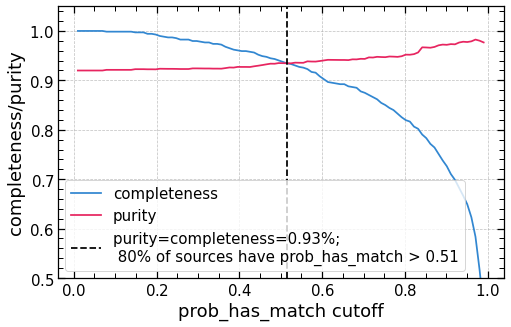

In [72]:
validation_df, p_any_cutoff = assess_goodnes_nway_cross_match(nway_res_ero)

<AxesSubplot:>

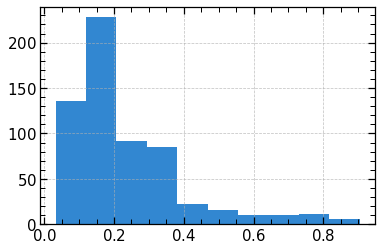

In [68]:
nway_res_ero.query("match_flag==1 & nnmag_grz!=-99.")['nnmag_grz'].hist()

In [69]:
validation_df.query('match_flag == True & desi_id!=desi_id_true_ctp & prob_has_match > 0.41')

,EROSITA,ID,pos_err,Separation_EROSITA_DESI,prob_has_match,prob_this_match,match_flag,desi_id,desi_id_true_ctp
1118,51,b'SRGe J104117.7+584929',0.851929,0.423018,0.990885,0.792326,1,b'9011_613766_39',b'9011_613766_43'
20883,1191,b'SRGe J103248.5+585748',1.774511,0.464231,0.999504,0.999234,1,b'9011_614509_3227',b'9011_614509_3219'
23410,1344,b'SRGe J104433.7+593921',1.481197,0.990236,0.901494,0.694036,1,b'9011_616728_2997',b'9011_616728_2976'
26059,1504,b'SRGe J110721.2+585635',3.549495,4.918735,0.466300,0.608116,1,b'9011_614527_2665',b'9011_614527_2647'
26241,1516,b'SRGe J104604.5+554430',1.667841,1.005961,0.994032,0.968382,1,b'9011_604375_859',b'9011_604375_855'
28121,1642,b'SRGe J104155.8+584500',1.751132,1.593202,0.996625,0.998227,1,b'9011_613766_1204',b'9011_613766_1201'
32302,1912,b'SRGe J103406.6+575604',1.816257,4.241325,0.663435,0.530350,1,b'9011_611485_1272',b'9011_611485_1263'
34824,2075,b'SRGe J105141.8+580100',2.425159,6.697378,0.961896,0.983141,1,b'9011_611494_2754',b'9011_611494_2691'
44585,2714,b'SRGe J103512.4+595613',3.705189,3.171018,0.837579,0.501449,1,b'9011_617451_1352',b'9011_617451_1374'
44997,2741,b'SRGe J104950.8+590804',2.673005,3.014218,0.955538,0.996205,1,b'9011_615261_3389',b'9011_615261_3409'


NWAY results for Source 1516:

This source probably has a counterpart (p_any=0.99)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,DESI,Separation_EROSITA_DESI,match_flag,prob_has_match,prob_this_match,ID,pos_err,desi_id_true_ctp,desi_id,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
26241,1516,95913,1.005961,1,0.994032,9.683815e-01,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_859',0.943712,-99.000000,-99.000000
26256,1516,2417458,2.221664,0,0.994032,3.161647e-02,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_855',-99.000000,-99.000000,-99.000000
26242,1516,469251,6.848700,0,0.994032,2.008266e-06,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_847',0.060488,-99.000000,-99.000000
26250,1516,1241758,10.313864,0,0.994032,2.604723e-10,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_823',-99.000000,0.326036,-99.000000
26249,1516,1091174,12.610228,0,0.994032,6.306517e-15,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_802',-99.000000,0.045998,-99.000000
26245,1516,703796,19.736497,0,0.994032,1.804417e-32,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_928',-99.000000,-99.000000,0.392033
26252,1516,2028526,20.830768,0,0.994032,2.611594e-36,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_932',-99.000000,0.056305,-99.000000
26248,1516,870390,23.626478,0,0.994032,7.866362e-46,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_950',0.241951,-99.000000,-99.000000
26246,1516,844717,24.637189,0,0.994032,4.468453e-48,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_951',-99.000000,-99.000000,0.089494
26254,1516,2209266,24.596856,0,0.994032,1.286416e-49,b'SRGe J104604.5+554430',1.667841,b'9011_604375_855',b'9011_604375_783',-99.000000,0.040517,-99.000000


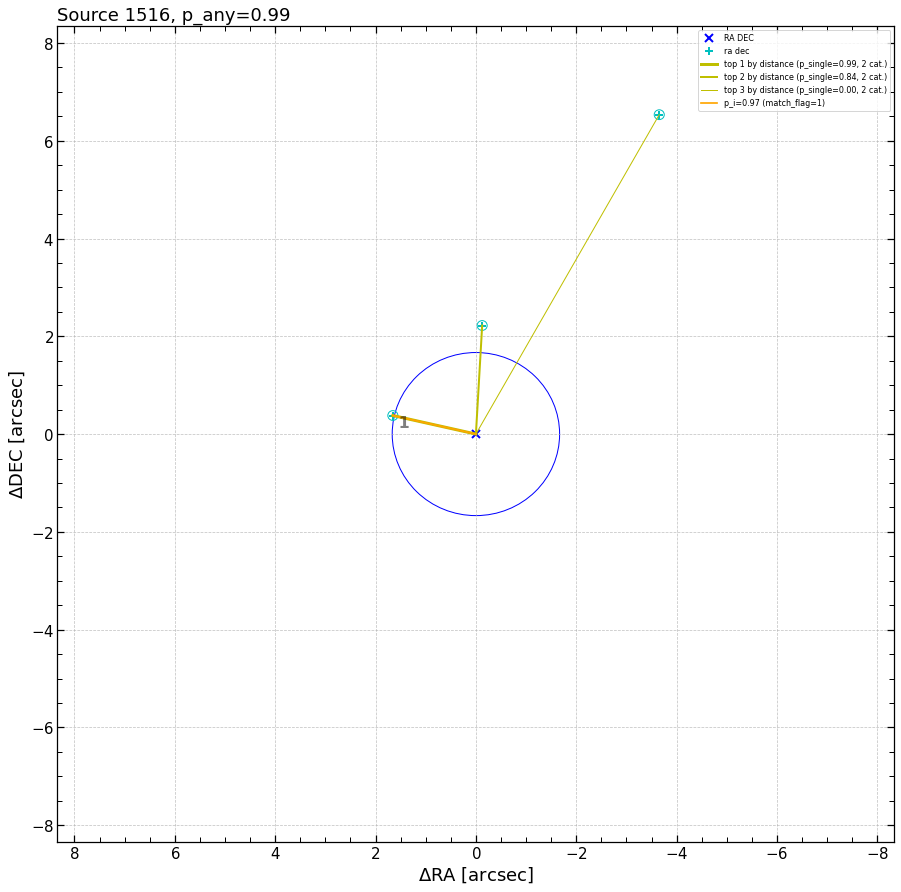

In [70]:

tmp_df = nway.explain(nway_res_ero, id = 1516, primary_id_col = 'EROSITA', cols_ra = ['RA', 'ra'], cols_dec=['DEC', 'dec'], cols_err = ['pos_err', 'desi_pos_err'],
tablenames = ['EROSITA', 'DESI'])
tmp_df[['EROSITA', 'DESI', 'Separation_EROSITA_DESI', 'match_flag',
       'prob_has_match', 'prob_this_match', 'ID', 'pos_err', 'desi_id_true_ctp', 'desi_id', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz']]

NWAY results for Source 5703:

This source probably has a counterpart (p_any=0.83)

Assuming it has a counterpart, we have the following possible associations:

Disclaimer: These results assume that the input (sky densities, positional errors, and priors) are correct.



,EROSITA,DESI,Separation_EROSITA_DESI,match_flag,prob_has_match,prob_this_match,ID,pos_err,desi_id_true_ctp,desi_id,nnmag_grzw1w2w3w4,nnmag_grzw1w2,nnmag_grz
88451,5703,350907,3.131846,1,0.831914,7.566276e-01,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3972',0.781308,-99.000000,-99.000000
88473,5703,2191236,2.194155,0,0.831914,1.422985e-01,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3957',0.132395,-99.000000,-99.000000
88463,5703,1651558,5.066231,0,0.831914,9.994513e-02,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3970',-99.000000,-99.000000,0.417243
88472,5703,2178586,11.173727,0,0.831914,4.235225e-04,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3985',-99.000000,0.023339,-99.000000
88467,5703,1964610,10.866076,0,0.831914,3.497811e-04,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_4024',0.103052,-99.000000,-99.000000
88449,5703,89744,15.249542,0,0.831914,2.442205e-04,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3890',0.934946,-99.000000,-99.000000
88471,5703,2152472,13.917861,0,0.831914,4.833228e-05,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3894',-99.000000,-99.000000,0.085438
88452,5703,397539,14.150633,0,0.831914,3.457579e-05,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3896',-99.000000,-99.000000,0.582881
88476,5703,2318692,15.785677,0,0.831914,1.109694e-05,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_4050',-99.000000,-99.000000,0.135396
88460,5703,1489567,14.725280,0,0.831914,6.960771e-06,b'SRGe J104712.3+573818',3.30802,b'9011_610722_3957',b'9011_610722_3968',-99.000000,0.061164,-99.000000


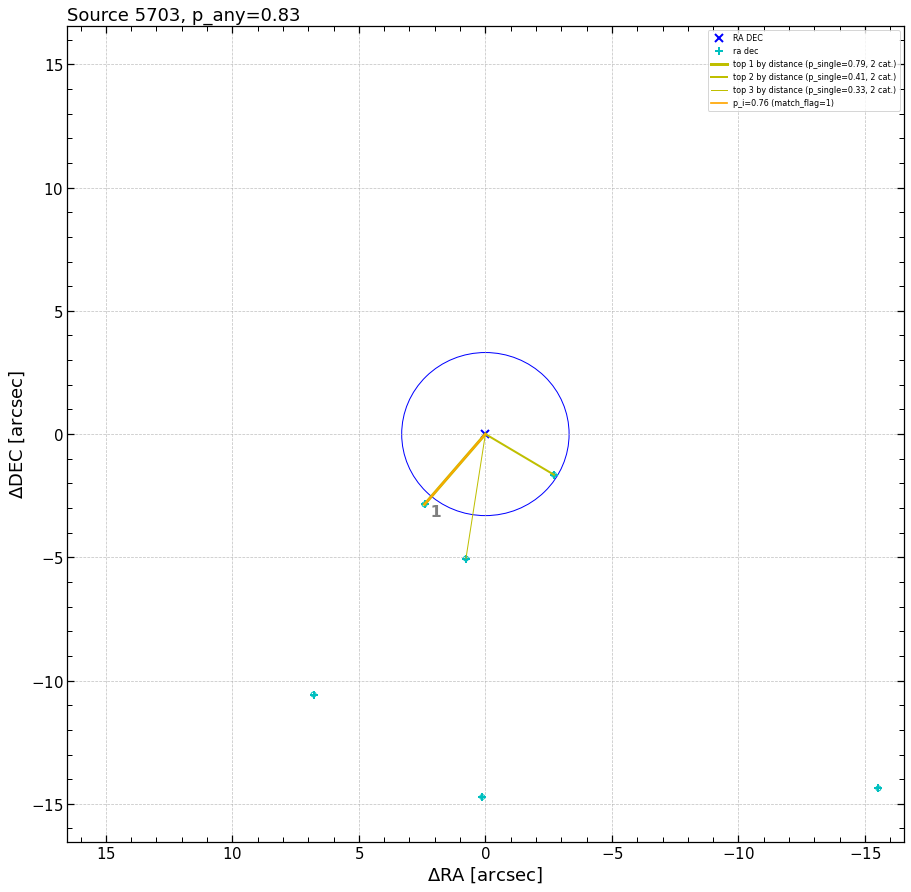

In [71]:
tmp_df = nway.explain(nway_res_ero, id = 5703, primary_id_col = 'EROSITA', cols_ra = ['RA', 'ra'], cols_dec=['DEC', 'dec'], cols_err = ['pos_err', 'desi_pos_err'],
tablenames = ['EROSITA', 'DESI'])
tmp_df[['EROSITA', 'DESI', 'Separation_EROSITA_DESI', 'match_flag',
       'prob_has_match', 'prob_this_match', 'ID', 'pos_err', 'desi_id_true_ctp', 'desi_id', 'nnmag_grzw1w2w3w4',
       'nnmag_grzw1w2', 'nnmag_grz']]